MAE (Mean Absolute Error): 171.8639578337584
MSE (Mean Squared Error): 162531.30204607785
R² (R-squared): 0.9047470087167826


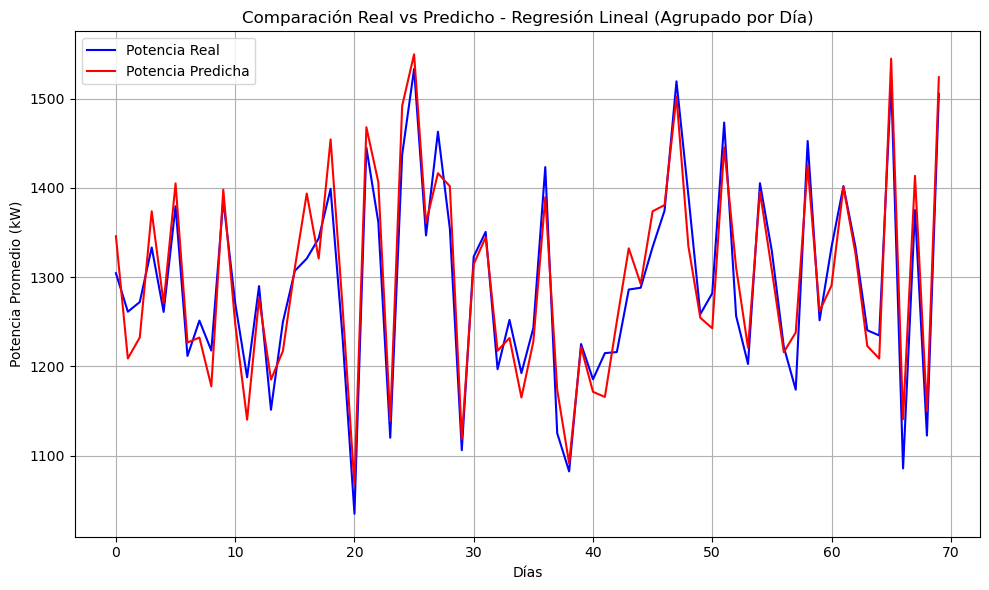

In [8]:
##REGRESION LINEAL##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('C:/Proyecto_Final/DataSetFinal.csv')

# 1. División de Datos
X = df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (kW)']]
y = df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Ingeniería de Características (Ejemplo: Características Polinómicas)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. Entrenamiento del Modelo (Ejemplo: Regresión Lineal)
model = LinearRegression()  
model.fit(X_train_poly, y_train)

# 4. Predicción en el Conjunto de Prueba
y_pred = model.predict(X_test_poly)

# 5. Evaluación del Modelo
mae_rl = mean_absolute_error(y_test, y_pred)
mse_rl = mean_squared_error(y_test, y_pred)
r2_rl = r2_score(y_test, y_pred)

print(f'MAE (Mean Absolute Error): {mae_rl}')
print(f'MSE (Mean Squared Error): {mse_rl}')
print(f'R² (R-squared): {r2_rl}')

# Gráfico Real vs Predicho
# Número de observaciones por día (144)
group_size = 144

# Agrupar los valores reales y predichos por día
y_test_grouped = y_test.values[:len(y_test) - len(y_test) % group_size].reshape(-1, group_size).mean(axis=1)
y_pred_grouped = y_pred[:len(y_pred) - len(y_pred) % group_size].reshape(-1, group_size).mean(axis=1)

# Gráfico Real vs Predicho (Agrupado)
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test_grouped)), y=y_test_grouped, label='Potencia Real', color='blue')
sns.lineplot(x=range(len(y_pred_grouped)), y=y_pred_grouped, label='Potencia Predicha', color='red')
plt.xlabel('Días')
plt.ylabel('Potencia Promedio (kW)')
plt.title('Comparación Real vs Predicho - Regresión Lineal (Agrupado por Día)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

MAE (Mean Absolute Error): 201.29468737961244
MSE (Mean Squared Error): 227851.12887805814
R² (R-squared): 0.8664657126370652


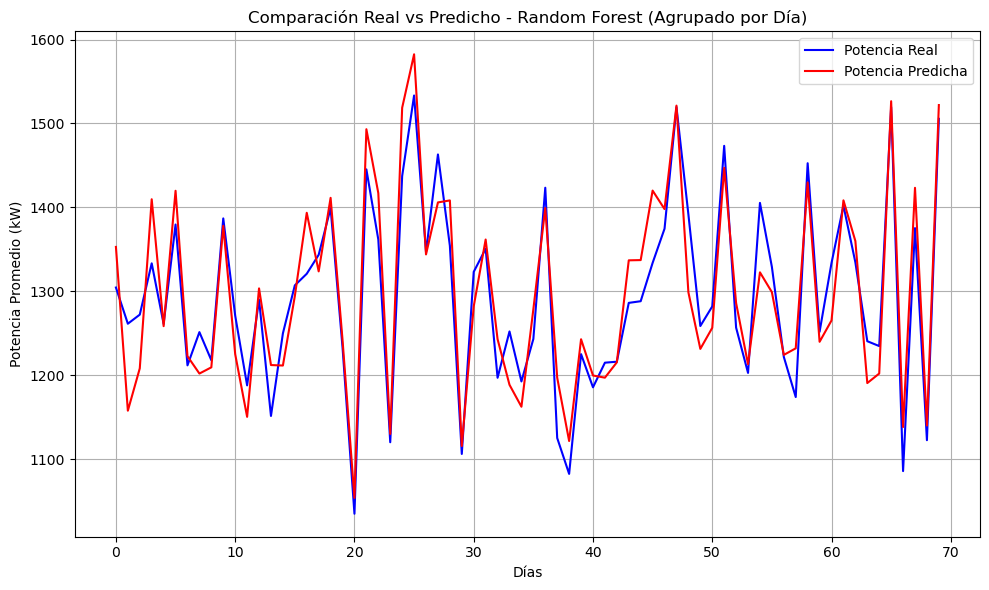

In [10]:
##RANDOM FOREST##

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Volver a cargar el dataset
df = pd.read_csv("C:/Proyecto_Final/DataSetFinal.csv")

# Definir variables predictoras y objetivo
X = df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (kW)']]  # Variables predictoras
y = df['LV ActivePower (kW)']  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MAE (Mean Absolute Error): {mae_rf}')
print(f'MSE (Mean Squared Error): {mse_rf}')
print(f'R² (R-squared): {r2_rf}')

# Gráfico Real vs Predicho
# Agrupar los valores reales y predichos por día (144 observaciones)
group_size = 144

# Agrupar los valores reales y predichos por día
y_test_grouped = y_test.values[:len(y_test) - len(y_test) % group_size].reshape(-1, group_size).mean(axis=1)
y_pred_grouped_rf = y_pred_rf[:len(y_pred_rf) - len(y_pred_rf) % group_size].reshape(-1, group_size).mean(axis=1)

# Gráfico Real vs Predicho (Agrupado)
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test_grouped)), y=y_test_grouped, label='Potencia Real', color='blue')
sns.lineplot(x=range(len(y_pred_grouped_rf)), y=y_pred_grouped_rf, label='Potencia Predicha', color='red')
plt.xlabel('Días')
plt.ylabel('Potencia Promedio (kW)')
plt.title('Comparación Real vs Predicho - Random Forest (Agrupado por Día)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
##LAZYPREDICT##

# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# Cargar el dataset
df = pd.read_csv("C:/Proyecto_Final/DataSetFinal.csv")

# Definir variables predictoras y objetivo
X = df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (kW)']]
y = df['LV ActivePower (kW)']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar LazyRegressor
lazy_regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_regressor.fit(X_train, X_test, y_train, y_test)

# Mostrar los resultados ordenados por R²
print(models.sort_values(by="R-Squared", ascending=False))

100%|██████████| 42/42 [17:02<00:00, 24.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 40424, number of used features: 2
[LightGBM] [Info] Start training from score 1311.361866
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
GaussianProcessRegressor                     0.91       0.91  399.02   
GradientBoostingRegressor                    0.91       0.91  399.93   
HistGradientBoostingRegressor                0.91       0.91  400.08   
XGBRegressor                                 0.91       0.91  400.33   
LGBMRegressor                                0.91       0.91  400.48   
MLPRegressor                                 0.90       0.90  405.56   
SVR              

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 40424, number of used features: 2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Start training from score 1311.361866
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
MAE (Mean Absolute Error): 166.33198549227842
MSE (Mean Squared Error): 159868.8876451902
R² (R-s

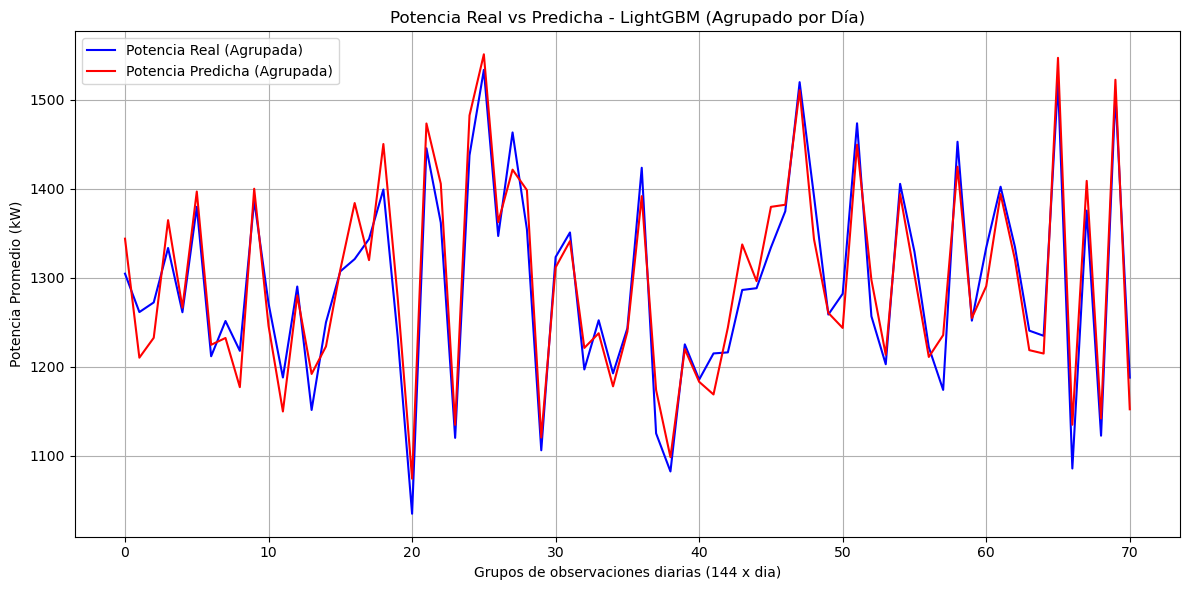

In [16]:
##LIGHTGBM ###  MODELO ESCOGIDO ##
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="joblib")
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Ajusta el número según tu configuración
# Cargar el dataset
df = pd.read_csv("C:/Proyecto_Final/DataSetFinal.csv")

# Reemplazar espacios en los nombres de las columnas por guiones bajos
df.columns = df.columns.str.replace(' ', '_')

# Definir variables predictoras y objetivo
X = df[['Wind_Speed_(m/s)', 'Theoretical_Power_Curve_(kW)']]  # Variables predictoras
y = df['LV_ActivePower_(kW)']  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo LGBMRegressor
lgb_model = LGBMRegressor(
    objective='regression',
    metric='rmse',  # Root Mean Squared Error
    num_leaves=31,  # Número de hojas en cada árbol
    learning_rate=0.05,
    feature_fraction=0.9,  # Fracción de características a considerar para cada iteración
    n_estimators=100  # Número de estimadores (máximos árboles)
)

# Entrenar el modelo LightGBM sin verbose
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Especificar el conjunto de validación
    eval_metric='rmse'  # Usar RMSE como métrica de evaluación
)

# Predicciones
y_pred_lgb = lgb_model.predict(X_test)

# Evaluar el modelo
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Imprimir los resultados de evaluación
print(f'MAE (Mean Absolute Error): {mae_lgb}')
print(f'MSE (Mean Squared Error): {mse_lgb}')
print(f'R² (R-squared): {r2_lgb}')


# Real vs Predicho (agrupamiento)
# Paso 1: Combinar los datos
df_resultados = pd.DataFrame({
    'Real': y_test.values,
    'Predicho': y_pred_lgb
})

# Paso 2: Agrupar en bloques de 144 valores (1 observacion cada 10 min, 144 en 1 dia)
step = 144
df_resultados['Grupo'] = df_resultados.index // step

# Paso 3: Promedio por grupo
df_agrupado = df_resultados.groupby('Grupo').mean()

# Paso 4: Visualización
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado.index, df_agrupado['Real'], label='Potencia Real (Agrupada)', color='blue')
plt.plot(df_agrupado.index, df_agrupado['Predicho'], label='Potencia Predicha (Agrupada)', color='red')
plt.xlabel(f'Grupos de observaciones diarias (144 x dia)')
plt.ylabel('Potencia Promedio (kW)')
plt.title('Potencia Real vs Predicha - LightGBM (Agrupado por Día)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()